In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers
!pip install torch
!pip install vncorenlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 66.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 31.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-py3-none-any.whl size=2645952 sha256=996c02f1b0a305215b961046eede7a36e586ee6c13a931b7ce3ea0adb7974c1f
  Stored in directory: /root/.cache/pip/wheels/5d/d9/b3/41f6c6b1ab758561fd4aab55dc0480b9d7a131c6aaa573a3fa
Successfully built vncorenlp


In [ ]:
import pandas as pd
import json

In [ ]:
def read_data(data_dir):
    with open(data_dir, 'r', encoding = 'utf-8') as f:
        data = json.load(f)
    return data

In [ ]:
dataset = read_data("/content/drive/MyDrive/pho-bert/UIT-ViQuAD.json")
contexts = []
questions = []
answers = []
ids = []
for data in dataset['data']:
    for para in data['paragraphs']:
        context = para['context']
        for qa in para['qas']:
            question = qa['question']
            for answer in qa['answers']:
                contexts.append(context)
                questions.append(question)
                answers.append({'answer_start': [answer['answer_start']], 'text': [answer['text']]})
                ids.append(qa['id'])
icqa = [ids, contexts, questions, answers] 

In [ ]:
contexts[1]

'Phạm Văn Đồng (1 tháng 3 năm 1906 – 29 tháng 4 năm 2000) là Thủ tướng đầu tiên của nước Cộng hòa Xã hội chủ nghĩa Việt Nam từ năm 1976 (từ năm 1981 gọi là Chủ tịch Hội đồng Bộ trưởng) cho đến khi nghỉ hưu năm 1987. Trước đó ông từng giữ chức vụ Thủ tướng Chính phủ Việt Nam Dân chủ Cộng hòa từ năm 1955 đến năm 1976. Ông là vị Thủ tướng Việt Nam tại vị lâu nhất (1955–1987). Ông là học trò, cộng sự của Chủ tịch Hồ Chí Minh. Ông có tên gọi thân mật là Tô, đây từng là bí danh của ông. Ông còn có tên gọi là Lâm Bá Kiệt khi làm Phó chủ nhiệm cơ quan Biện sự xứ tại Quế Lâm (Chủ nhiệm là Hồ Học Lãm).'

In [ ]:
print(dataset['data'][1])

{'title': 'Thực vật có hoa', 'paragraphs': [{'qas': [{'question': 'Thuật ngữ thực vật hạt kín Angioosperm được định nghĩa đầu tiên trên ngôn ngữ nào?', 'answers': [{'answer_start': 67, 'text': 'tiếng Hy Lạp'}], 'id': 'uit_000042', 'is_impossible': False}, {'question': 'Angiospermae được nhà bác nào định nghĩa vào năm 1690?', 'answers': [{'answer_start': 128, 'text': 'Paul Hermann'}], 'id': 'uit_000043', 'is_impossible': False}, {'question': 'Angiospermae được nhà bác Paul Hermann định nghĩa vào năm 1690 bao gồm những loai thực nào?', 'answers': [{'answer_start': 283, 'text': 'thực vật có hoa và tạo ra các hạt được bao phủ trong các bao vỏ'}], 'id': 'uit_000044', 'is_impossible': False}, {'question': 'Cây Tuế và cây Thông thuộc loại thực vật nào?', 'answers': [{'answer_start': 985, 'text': 'thực vật hạt trần'}], 'id': 'uit_000045', 'is_impossible': False}, {'question': 'Robert Brown phát hiện sự tồn tại của noãn trần trong cây Tuế và cây Thông vào thời gian nào?', 'answers': [{'answer_s

In [ ]:
df = pd.DataFrame(list(zip(ids, contexts, questions, answers)),
               columns =['ids', 'contexts', 'questions', 'answers'])


In [ ]:
data = pd.DataFrame(list(df),columns=['data'])

In [ ]:
kk = list(df)

In [ ]:
train=df.sample(frac=0.8,random_state=200)
val=df.drop(train.index)

In [ ]:
import json

context_empty=[]
question_empty=[]
answer_empty =[]
text_empty = []
answer_start_empty = []
with open('/content/drive/MyDrive/pho-bert/test_vi.json', 'r', encoding='utf-8') as f:
    dataset = json.load(f)
for data in dataset['data']:
    for paragraph in data["paragraphs"]:
        for qa in paragraph["qas"]:
            if not qa["question"] or qa["question"] is None:
                question_empty.append("Empty question found.")
            if qa["answers"] is None:
                answer_empty.append("Empty answer found.")
            else:
              for text in qa["answers"]:
                if text["text"] is None or not text["text"]:
                    text_empty.append("Empty answer found.")
                if pd.isna(text["answer_start"]):
                    answer_start_empty.append(qa["id"])
        if not paragraph["context"] or paragraph["context"] is None:
            context_empty.append("Empty context found.")

In [ ]:
print(dataset['data'][1])

{'title': 'Bắc Phi', 'paragraphs': [{'qas': [{'question': 'Những miền nào thuộc khu vực Maghreb?', 'answers': [{'answer_start': 24, 'text': 'Tây Sahara, Maroc, Algérie và Libya'}], 'id': 'uit_024277', 'is_impossible': False}, {'question': 'Vì sao Bắc Phi cũng được xem như một khu vực của Trung Đông?', 'answers': [{'answer_start': 145, 'text': 'vì hai vùng Bắc Phi và Trung Đông tạo nên thế giới Ả Rập'}], 'id': 'uit_024278', 'is_impossible': False}, {'question': 'Bán đảo nào đã làm nên tên gọi "quốc gia liên châu lục" của Ai Cập?', 'answers': [{'answer_start': 213, 'text': 'bán đảo Sinai'}], 'id': 'uit_024279', 'is_impossible': False}, {'question': 'Quốc gia nào có quyền hành chính trên khu vực Tây Sahara?', 'answers': [{'answer_start': 380, 'text': 'Maroc'}], 'id': 'uit_024280', 'is_impossible': False}, {'question': 'Cuộc đấu tranh với Maroc về chủ quyền tại khu vực Tây Sahara với Maroc do tổ chức nào thực hiện?', 'answers': [{'answer_start': 393, 'text': 'tổ chức ly khai Polisario Fron

In [ ]:
print(len(context_empty))
print(len(question_empty))
print(len(answer_empty))
print(len(text_empty))
print(len(answer_start_empty))

0
0
0
0
0


In [ ]:
from vncorenlp import VnCoreNLP
annotator = VnCoreNLP("/content/drive/MyDrive/pho-bert/VnCoreNLP-1.1.1/VnCoreNLP-1.1.1/VnCoreNLP-1.1.1.jar",port=9000, annotators="wseg,pos,ner,parse", max_heap_size='-Xmx2g') 
def VnCoreNLP1(X_train):
  X_train = annotator.tokenize(X_train)
  p = ''
  for i in range(0, len(X_train)):
    for x in X_train[i]:
      w = ''
      w = w + x + ' '
      p+=w
  p=p.replace(" ,",",")
  p=p.replace(" .",".")
  p=p.replace("( ","(")
  p=p.replace(" )",")")
  p=p.replace(' " ',' "')
  p=p.replace("* ","*")
  p=p.replace(" ;",";")
  p=p.replace(" ?","?")
  p=p.replace(" {","{")
  p=p.replace("{ ","{")
  p=p.replace(" }","}")
  p=p.replace("} ","}")
  p=p.replace(" /","/")
  p=p.replace("/ ","/")
  return p

In [ ]:
# from transformers import BertTokenizer, BertForPreTraining, BertForQuestionAnswering, BertModel, BertConfig
# from transformers import XLMRobertaForQuestionAnswering, XLMRobertaTokenizer
# import torch
# import torch.nn as nn
# from transformers.data.metrics.squad_metrics import compute_predictions_log_probs, compute_predictions_logits, squad_evaluate
from transformers.data.processors.squad import SquadResult, SquadV1Processor, SquadV2Processor, SquadProcessor, SquadExample
# from transformers import AutoModel, AutoTokenizer
# from transformers import RobertaForQuestionAnswering, RobertaConfig, WEIGHTS_NAME

In [ ]:
def checkAns(answer, context_text):
  ans=context_text[answer["answer_start"] : answer["answer_start"]+ len(answer["text"])]
  l=ans.replace("_"," ")
  if(l == answer["text"]):
    return ans, answer["answer_start"]
  else:
    firstWord=answer["text"].split(' ')[0]
    lenWord=len(firstWord)
    for i in range(1,8):
      try:
        position_1=answer["answer_start"]-i
        word=context_text[position_1: position_1+ lenWord]
        if(firstWord == word):
          return context_text[position_1: position_1+ len(answer["text"])],position_1
        position_2=answer["answer_start"]+i
        word=context_text[position_2: position_2+ lenWord]
        if(firstWord == word):
          return context_text[position_2: position_2+ len(answer["text"])],position_2
      except:
        return ans, answer["answer_start"]
    return ans, answer["answer_start"]

In [ ]:
def checkTempAns(answer, context_text):
  firstWord=answer["text"].split(' ')[0]
  lenWord=len(firstWord)
  for i in range(1,8):
    try:
      position_1=answer["answer_start"]-i
      word=context_text[position_1: position_1+ lenWord]
      if(firstWord == word):
        return context_text[position_1: position_1+ len(answer["text"])],position_1
      position_2=answer["answer_start"]+i
      word=context_text[position_2: position_2+ lenWord]
      if(firstWord == word):
        return context_text[position_2: position_2+ len(answer["text"])],position_2
    except:
      return context_text[answer["answer_start"] : answer["answer_start"]+ len(answer["text"])], answer["answer_start"]
  return context_text[answer["answer_start"] : answer["answer_start"]+ len(answer["text"])], answer["answer_start"]

In [ ]:
from tqdm import tqdm
class VnCoreSquad(SquadProcessor):
  train_file = "train-v1.1.json"
  dev_file = "dev-v1.1.json"
  def _create_examples(self, input_data, set_type):
        is_training = set_type == "train"
        examples = []
        demso=0
        for entry in tqdm(input_data):
            title = entry["title"] 
            for paragraph in entry["paragraphs"]:
                context_text = VnCoreNLP1(paragraph["context"])
                for qa in paragraph["qas"]:
                    qas_id = qa["id"]
                    question_text = VnCoreNLP1(qa["question"])
                    start_position_character = None
                    answer_text = None
                    answers = []

                    is_impossible = qa.get("is_impossible", False)
                    if not is_impossible:
                        if is_training:
                            answer = qa["answers"][0]
                            answer_text, start_position_character=checkAns(answer, context_text)
                            qa["answers"][0].update({"text": answer_text})
                            qa["answers"][0].update({"answer_start": start_position_character})
                        else:
                            for k in range(0, len(qa["answers"])):
                              ans, start_position=checkTempAns(qa["answers"][k],context_text)
                              qa["answers"][k].update({"text": ans})
                              qa["answers"][k].update({"answer_start": start_position})
                              
                            answers = qa["answers"]
                    example = SquadExample(
                        qas_id=qas_id,
                        question_text=question_text,
                        context_text=context_text,
                        answer_text=answer_text,
                        start_position_character=start_position_character,
                        title=title,
                        is_impossible=is_impossible,
                        answers=answers,
                    )
                    examples.append(example)
        return examples
processor = VnCoreSquad()

In [ ]:
train_examples = processor.get_train_examples('','/content/drive/MyDrive/pho-bert/UIT-ViQuAD.json')

100%|██████████| 138/138 [03:25<00:00,  1.49s/it]


In [ ]:
context_tooken = []
for context in contexts:
  context_tooken.append(VnCoreNLP1(context))

In [ ]:
context_lenght_list = []
for word in context_tooken:
  word_count = len(word.split())
  context_lenght_list.append(word_count)

In [ ]:
import statistics
min_value = min(context_lenght_list)
max_value = max(context_lenght_list)
mean_value = statistics.mean(context_lenght_list)


print("Minimum value:", min_value)
print("Maximum value:", max_value)
print("Mean value:", mean_value)

Minimum value: 63
Maximum value: 1149
Mean value: 135.05088357588357


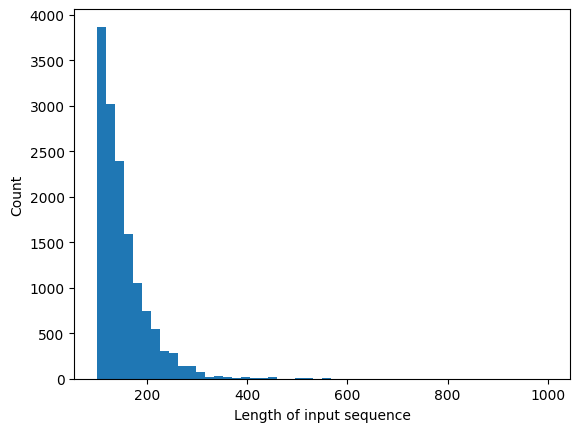

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Tính độ dài của các chuỗi trong tập dữ liệu
lengths = [ ex for ex in context_lenght_list]

# Vẽ biểu đồ phân bố độ dài
plt.hist(lengths, bins=50, range=(100,1000))
plt.xlabel('Length of input sequence')
plt.ylabel('Count')


plt.show()

Q1=  156.0


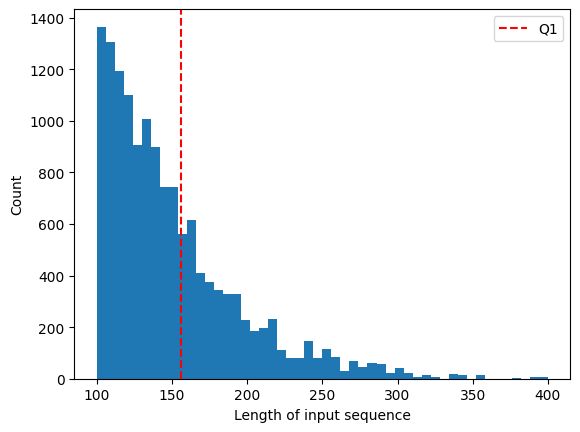

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Tính độ dài của các chuỗi trong tập dữ liệu
lengths = [ex for ex in context_lenght_list]

# Tính Q1, Q2, Q3
q1 = np.percentile(lengths, 75)
print("Q1= " ,q1)
# q2 = np.percentile(lengths, 50)
# q3 = np.percentile(lengths, 75)

# Vẽ biểu đồ phân bố độ dài
plt.hist(lengths, bins=50, range=(100,400))
plt.xlabel('Length of input sequence')
plt.ylabel('Count')

# Vẽ các đường thẳng thể hiện Q1, Q2, Q3
plt.axvline(q1, color='r', linestyle='--', label='Q1')
# plt.axvline(q2, color='g', linestyle='--', label='Q2')
# plt.axvline(q3, color='b', linestyle='--', label='Q3')

# Thêm legend
plt.legend()

plt.show()

In [ ]:
import json

split_ratio = 0.8  # 80% for training, 20% for validation
# Load the entire dataset from the JSON file
with open('/content/UIT-ViQuAD.json', 'r', encoding='utf-8') as f:
    dataset = json.load(f)['data']

# Split the dataset into training and validation sets
split_index = int(len(dataset) * split_ratio)
split10 = int(len(dataset) * 0.1)
train_data = dataset[:split_index]
remain = dataset[split_index:]
val = remain[:split10]
test = remain[split10:]
# Save the training set to a new file
with open('train_vi.json', 'w', encoding='utf-8') as f:
    json.dump({'data': train_data}, f, ensure_ascii=False)

# Save the validation set to a new file
with open('val_vi.json', 'w', encoding='utf-8') as f:
    json.dump({'data': val}, f, ensure_ascii=False)

    # Save the validation set to a new file
with open('test_vi.json', 'w', encoding='utf-8') as f:
    json.dump({'data': test}, f, ensure_ascii=False)